For those of you, who have already heard about GANs and are wondering *"What's the hype about?* should definitely go through this kernel to see the immense potential these new species of networks have. 

And for those who have probably heard the name for the first time, you would be all the more amazed when you will learn about these networks.

In [28]:
from keras.layers import BatchNormalization, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout ,ZeroPadding2D
from keras.layers import Add, Dense, Activation,    BatchNormalization, Flatten,Input 
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Model
import numpy as np
from keras import layers, utils, regularizers
from keras.regularizers import l2

GANs are a class of Unsupervised Learning Algorithms that do much more than just recognizing image / voice , predicting or translating. They implement  deep neural networks or CNN and are comprised of two parts, pitting one against the other (thus the “adversarial”). These two parts are called the Generator and the Discriminator.

In [29]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, 

from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam,SGD
import keras
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
print(os.listdir("../input"))



SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-29-25a8d4b07b42>, line 1)

In [ ]:
from os import listdir, makedirs
from os.path import join, exists, expanduser

cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
datasets_dir = join(cache_dir, 'datasets') # /cifar-10-batches-py
if not exists(datasets_dir):
    makedirs(datasets_dir)


!cp ../input/cifar-10-python.tar.gz ~/.keras/datasets/
!ln -s  ~/.keras/datasets/cifar-10-python.tar.gz ~/.keras/datasets/cifar-10-batches-py.tar.gz
!tar xzvf ~/.keras/datasets/cifar-10-python.tar.gz -C ~/.keras/datasets/

In [30]:
import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Load CIFAR10 data
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# define generators for training and validation data
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(x_train)
val_datagen.fit(x_train)

50000


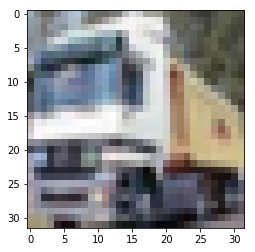

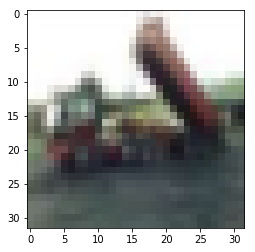

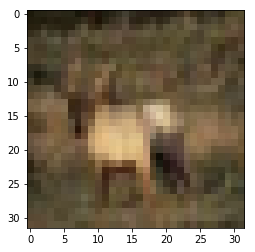

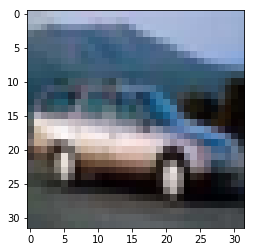

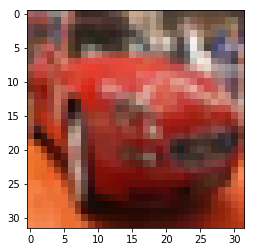

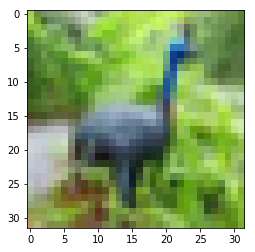

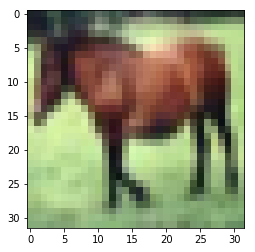

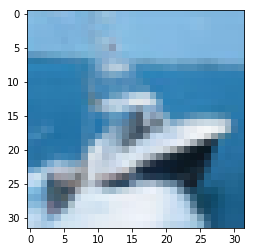

In [31]:
print(len(x_train))
for i in range(1,9):
    plt.imshow(x_train[i])
    plt.show()
    
    i=i+1

     

In [32]:
 
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


 
classes = 10
epochs = 50
batch_size = 32
patience = 7

def identity_block(X, f, filters, stage, block):
 
    
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X) 

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X) 
    
    return X

def convolutional_block(X, f, filters, stage, block, s = 2):
 
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path 
    X = Conv2D(F2, (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(F3, (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Shortcut path
    X_shortcut = Conv2D(F3, (1, 1), strides = (s, s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X


In [33]:

def ResNet56(input_shape = (32, 32, 3)):

    
    X_input = Input(input_shape)
    
    # Zero-Padding
    X = ZeroPadding2D((2, 2))(X_input)
    
    # Stage 1
    X = Conv2D(64, (4, 4), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block = 'a', s = 2)
    X = identity_block(X, f = 3, filters = [128, 128, 512], stage = 3, block = 'b')
    X = identity_block(X, f = 3, filters = [128, 128, 512], stage = 3, block = 'c')
    X = identity_block(X, f = 3, filters = [128, 128, 512], stage = 3, block = 'd')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block = 'a', s = 2)
    X = identity_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block = 'b')
    X = identity_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block = 'c')
    X = identity_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block = 'd')
    X = identity_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block = 'e')
    X = identity_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block = 'f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block = 'a', s = 2)
    X = identity_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block = 'b')
    X = identity_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block = 'c')

    # AVGPOOL 
    X = AveragePooling2D((2, 2), name = 'avg_pool')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.01))(X)
    X = Dropout(0.55)(X)
    X = Dense(classes, activation = 'softmax', kernel_regularizer=regularizers.l2(0.01))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [34]:
model = ResNet56()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 36, 36, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 33, 33, 64)   3136        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 33, 33, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
lr_reducer = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=7, min_lr=10e-7, epsilon=0.01, verbose=1)
early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=1)
callbacks= [lr_reducer, early_stopper]
 
# define loss, metrics, optimizer
model.compile(keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
 
# fits the model on batches with real-time data augmentation
batch_size = 32

model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train)//batch_size, epochs=50,
                    validation_data=val_datagen.flow(x_test, y_test, batch_size=batch_size), 
                    validation_steps=len(x_test)//batch_size,
                    callbacks=callbacks, initial_epoch=0)

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 141s 90ms/step - loss: 6.2253 - acc: 0.2140 - val_loss: 3.3943 - val_acc: 0.3082
Epoch 2/50
 511/1562 [========>.....................] - ETA: 1:22 - loss: 3.0257 - acc: 0.3076

In [ ]:
model.evaluate_generator(val_datagen.flow(x_test,y_test), steps= len(x_test)/32, use_multiprocessing = True )
